In [372]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [373]:
data=pd.read_excel(r'C:\Users\DELL\Downloads\csvfiles\Data Bank\Flight Prediction\Data_Train.xlsx')
test=pd.read_excel(r'C:\Users\DELL\Downloads\csvfiles\Data Bank\Flight Prediction\Test_set.xlsx')

In [374]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [375]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [376]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [377]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [378]:
data.dropna(inplace=True)

In [379]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [380]:
data.duplicated().sum()

220

In [381]:
test.duplicated().sum()

26

In [382]:
data.drop_duplicates(inplace=True)

In [383]:
test.drop_duplicates(inplace=True)

In [384]:
data.duplicated().sum()

0

In [385]:
# data type convert

In [386]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [387]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


In [388]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2645 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2645 non-null   object
 1   Date_of_Journey  2645 non-null   object
 2   Source           2645 non-null   object
 3   Destination      2645 non-null   object
 4   Route            2645 non-null   object
 5   Dep_Time         2645 non-null   object
 6   Arrival_Time     2645 non-null   object
 7   Duration         2645 non-null   object
 8   Total_Stops      2645 non-null   object
 9   Additional_Info  2645 non-null   object
dtypes: object(10)
memory usage: 227.3+ KB


In [389]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_20936\3889776158.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])


In [390]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [391]:
# Specify the correct date format
test['Date_of_Journey'] = pd.to_datetime(test['Date_of_Journey'], format='%d/%m/%Y')


In [392]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2645 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2645 non-null   object        
 1   Date_of_Journey  2645 non-null   datetime64[ns]
 2   Source           2645 non-null   object        
 3   Destination      2645 non-null   object        
 4   Route            2645 non-null   object        
 5   Dep_Time         2645 non-null   object        
 6   Arrival_Time     2645 non-null   object        
 7   Duration         2645 non-null   object        
 8   Total_Stops      2645 non-null   object        
 9   Additional_Info  2645 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 227.3+ KB


In [393]:
data.nunique()

Airline              12
Date_of_Journey      40
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [394]:
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'], format='%H:%M').dt.time

In [395]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55:00,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45:00,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20:00,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30:00,14:10,2h 40m,non-stop,No info,12648


In [396]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  datetime64[ns]
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10462 non-null  object        
 6   Arrival_Time     10462 non-null  object        
 7   Duration         10462 non-null  object        
 8   Total_Stops      10462 non-null  object        
 9   Additional_Info  10462 non-null  object        
 10  Price            10462 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 980.8+ KB


In [397]:
data['Dep_Time'].unique()

array([datetime.time(22, 20), datetime.time(5, 50), datetime.time(9, 25),
       datetime.time(18, 5), datetime.time(16, 50), datetime.time(9, 0),
       datetime.time(18, 55), datetime.time(8, 0), datetime.time(8, 55),
       datetime.time(11, 25), datetime.time(9, 45), datetime.time(20, 20),
       datetime.time(11, 40), datetime.time(21, 10),
       datetime.time(17, 15), datetime.time(16, 40), datetime.time(8, 45),
       datetime.time(14, 0), datetime.time(20, 15), datetime.time(16, 0),
       datetime.time(14, 10), datetime.time(22, 0), datetime.time(4, 0),
       datetime.time(21, 25), datetime.time(21, 50), datetime.time(7, 0),
       datetime.time(7, 5), datetime.time(9, 50), datetime.time(14, 35),
       datetime.time(10, 35), datetime.time(15, 5), datetime.time(14, 15),
       datetime.time(6, 45), datetime.time(20, 55), datetime.time(11, 10),
       datetime.time(5, 45), datetime.time(19, 0), datetime.time(23, 5),
       datetime.time(11, 0), datetime.time(9, 35), datetime.

In [398]:
# Extract time using str.split
data['Arrival_Time'] = data['Arrival_Time'].str.split(' ').str[0]
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'], format='%H:%M').dt.time

In [399]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55:00,22:25:00,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45:00,23:20:00,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20:00,11:20:00,3h,non-stop,No info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30:00,14:10:00,2h 40m,non-stop,No info,12648


In [400]:
data['Source_Destination'] = data['Source'] + ' to ' + data['Destination']

In [401]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_Destination
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897,Banglore to New Delhi
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662,Kolkata to Banglore
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882,Delhi to Cochin
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218,Kolkata to Banglore
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302,Banglore to New Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55:00,22:25:00,2h 30m,non-stop,No info,4107,Kolkata to Banglore
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45:00,23:20:00,2h 35m,non-stop,No info,4145,Kolkata to Banglore
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20:00,11:20:00,3h,non-stop,No info,7229,Banglore to Delhi
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30:00,14:10:00,2h 40m,non-stop,No info,12648,Banglore to New Delhi


In [402]:
data['month']=data['Date_of_Journey'].dt.month_name()

In [403]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_Destination,month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897,Banglore to New Delhi,March
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662,Kolkata to Banglore,May
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882,Delhi to Cochin,June
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218,Kolkata to Banglore,May
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302,Banglore to New Delhi,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55:00,22:25:00,2h 30m,non-stop,No info,4107,Kolkata to Banglore,April
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45:00,23:20:00,2h 35m,non-stop,No info,4145,Kolkata to Banglore,April
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20:00,11:20:00,3h,non-stop,No info,7229,Banglore to Delhi,April
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30:00,14:10:00,2h 40m,non-stop,No info,12648,Banglore to New Delhi,March


In [404]:
data.nunique()

Airline                 12
Date_of_Journey         40
Source                   5
Destination              6
Route                  128
Dep_Time               222
Arrival_Time           223
Duration               368
Total_Stops              5
Additional_Info         10
Price                 1870
Source_Destination       6
month                    4
dtype: int64

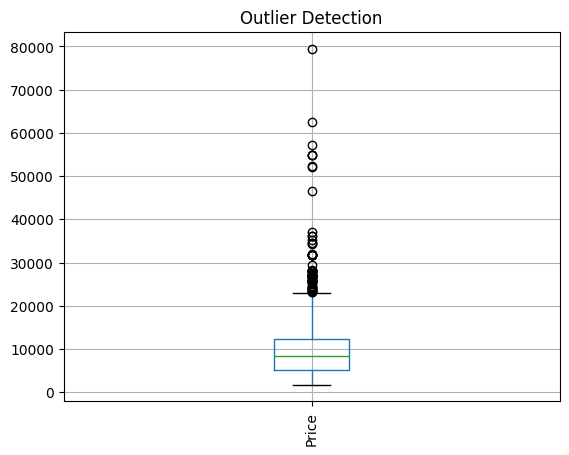

In [405]:
plt.title('Outlier Detection')
data.boxplot()
plt.xticks(rotation=90)
plt.show()

In [406]:
q1=np.percentile(data['Price'],(25))
q3=np.percentile(data['Price'],(75))


In [407]:
q1

5224.0

In [408]:
q3


12344.75

In [409]:
iqr=q3-q1


In [410]:
lb=q1-1.5*iqr


In [411]:
ub=q3+1.5*iqr

In [412]:

data=data[(data['Price']>lb )& (data['Price']<ub)]

In [413]:
data.shape

(10368, 13)

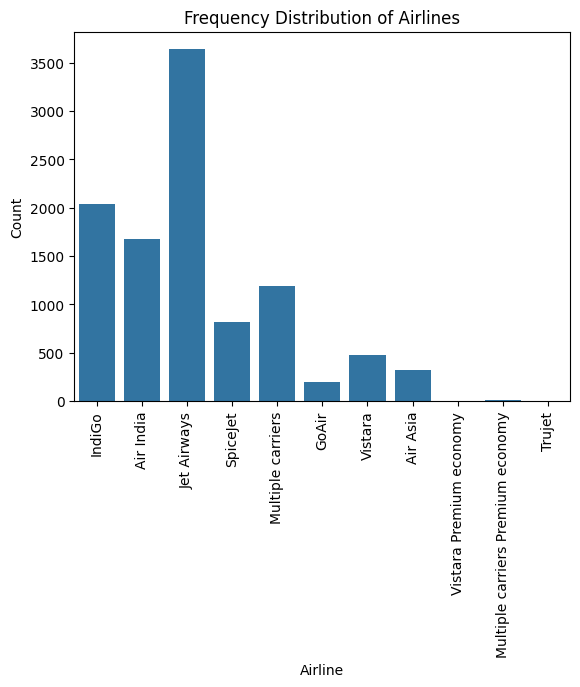

In [414]:
plt.title('Frequency Distribution of Airlines')
sns.countplot(x='Airline',data=data)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

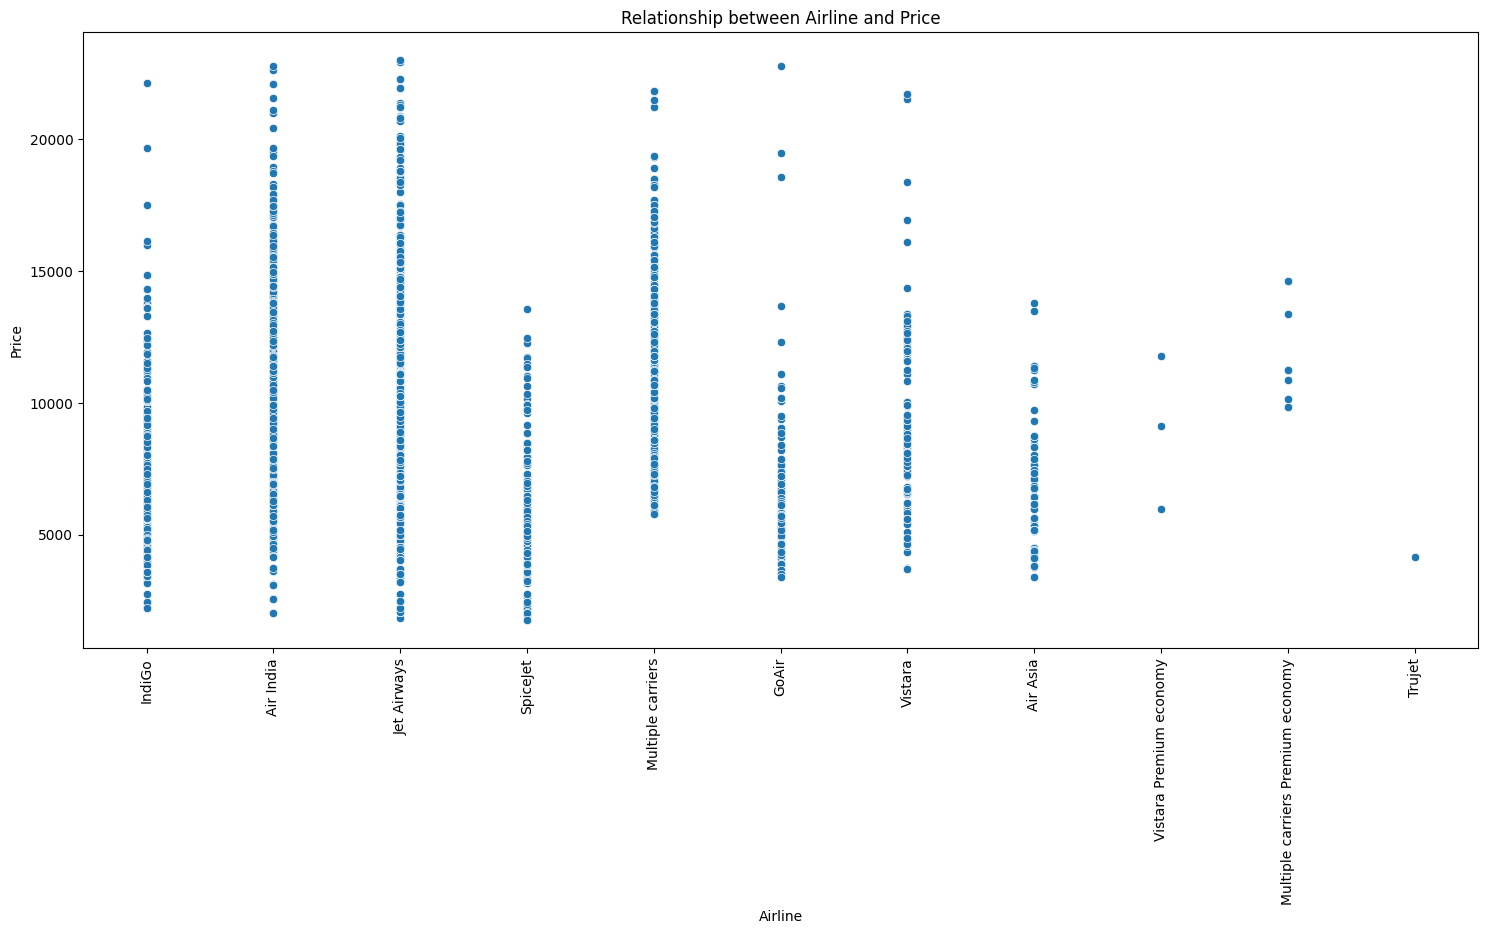

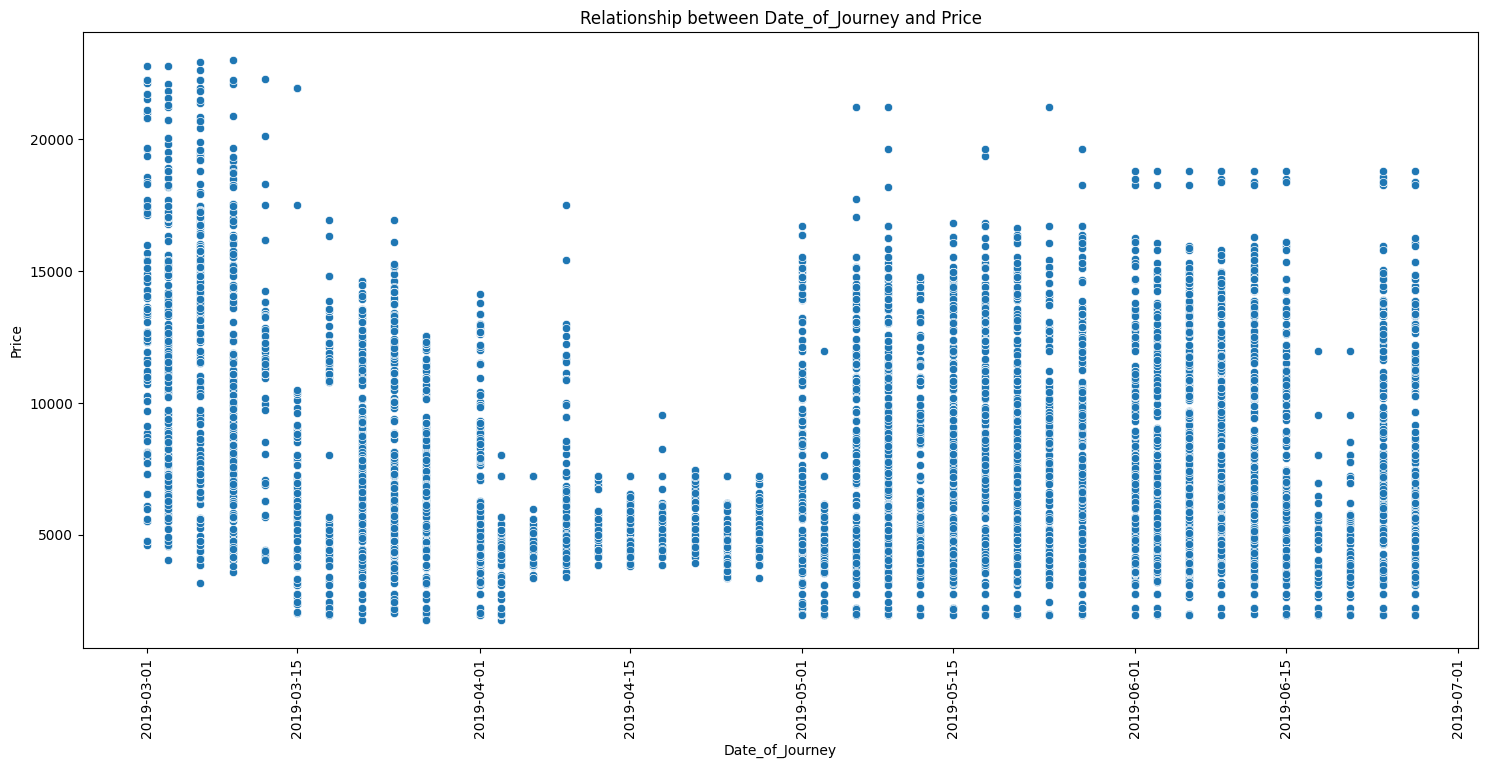

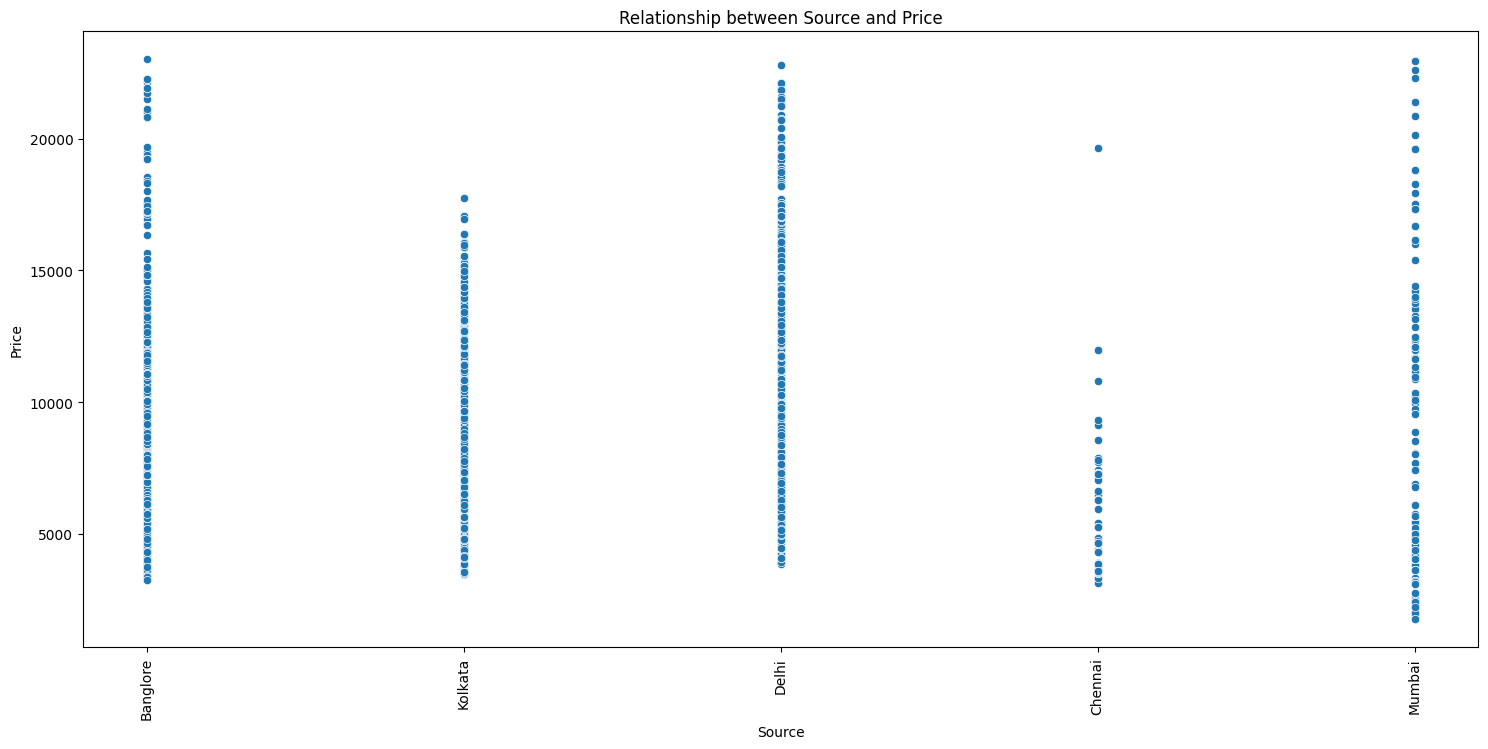

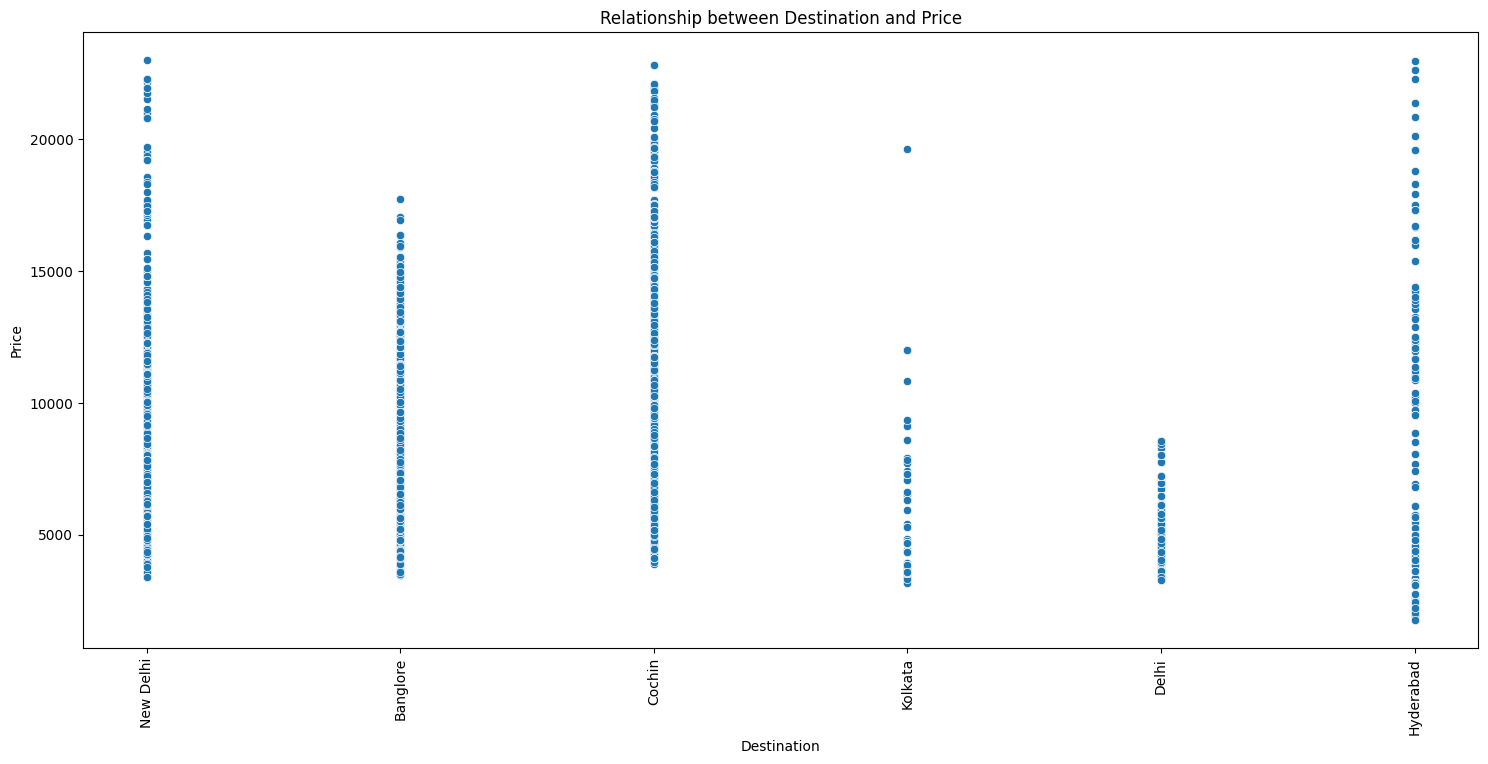

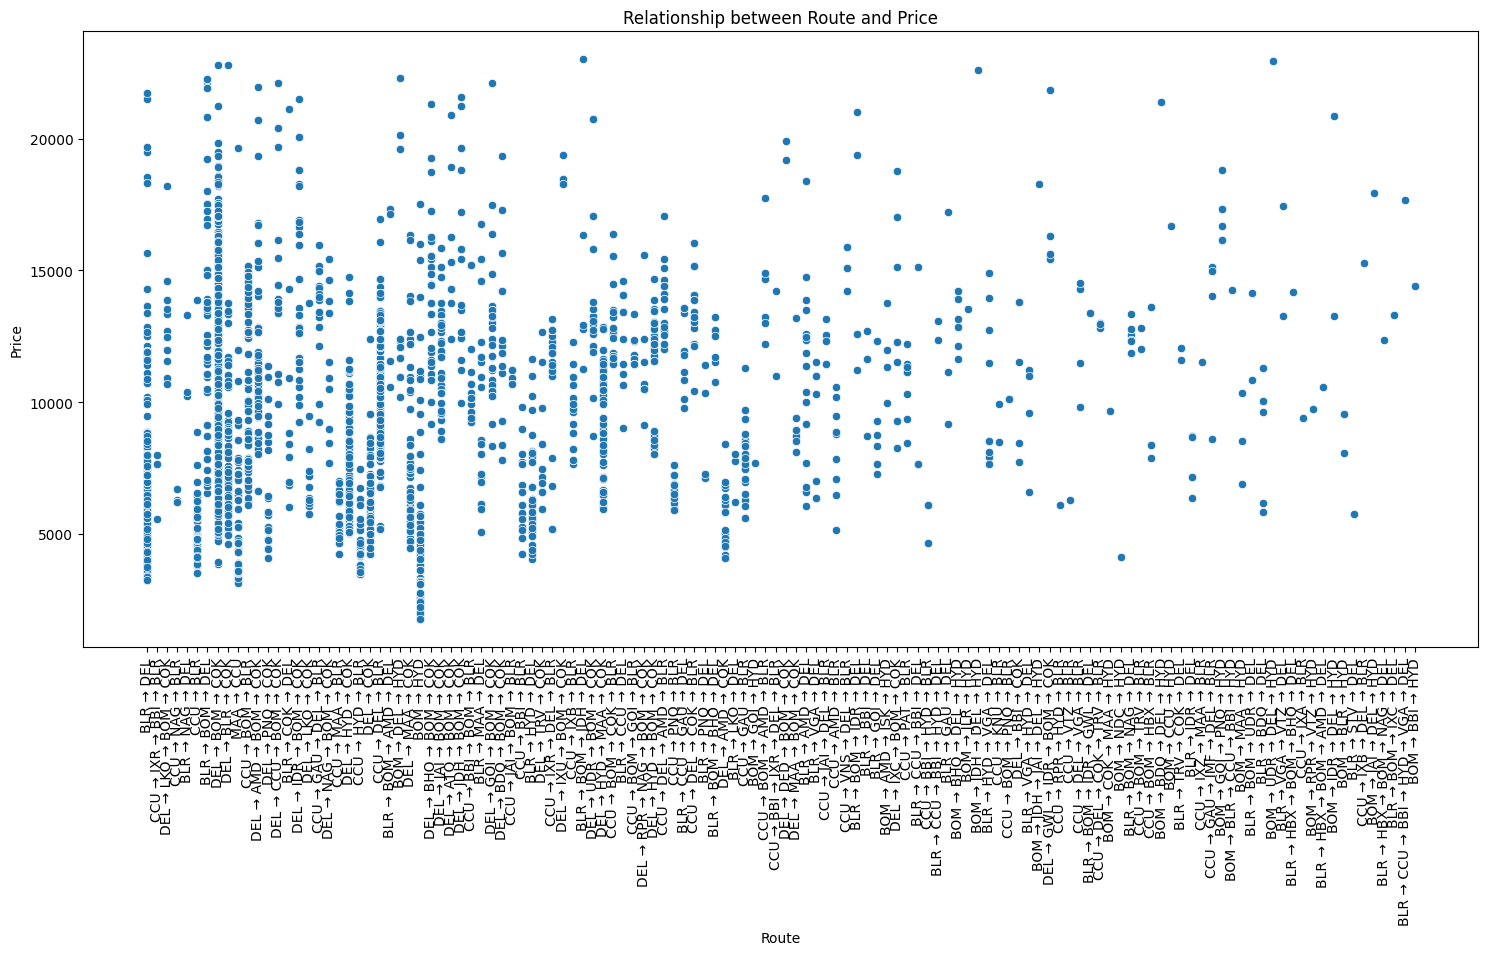

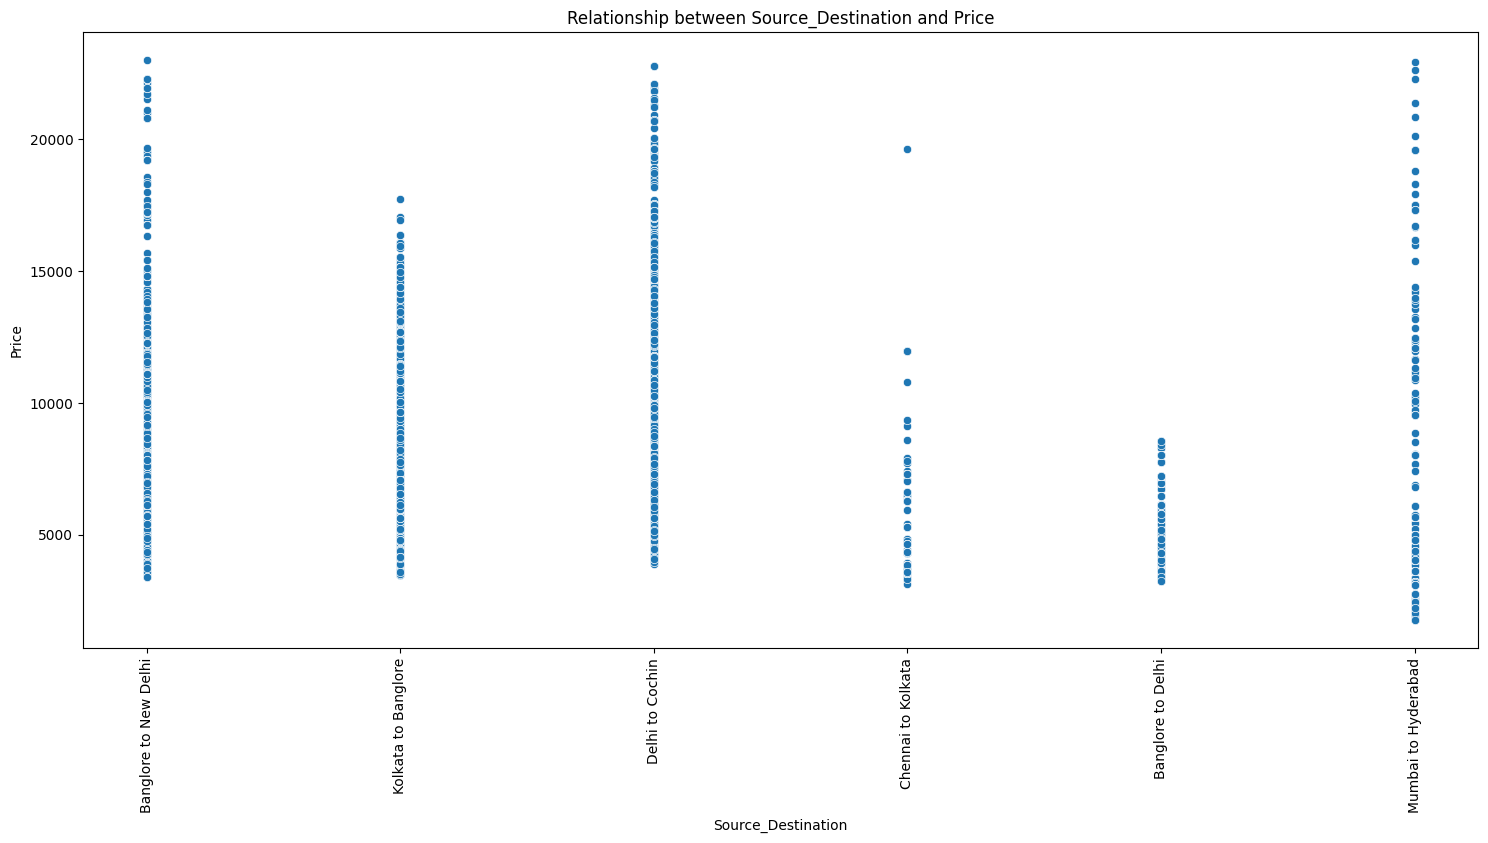

In [ ]:
x_vars=['Airline', 'Date_of_Journey', 'Route','Source_Destination']
for var in x_vars:
    plt.figure(figsize=(18,8))
    sns.scatterplot(x=var, y='Price', data=data)
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.title(f'Relationship between {var} and Price')
    plt.xticks(rotation=90)
    plt.show()

In [416]:
data['Source'].value_counts().sort_values(ascending=False)

Source
Delhi       4329
Kolkata     2859
Banglore    2107
Mumbai       692
Chennai      381
Name: count, dtype: int64

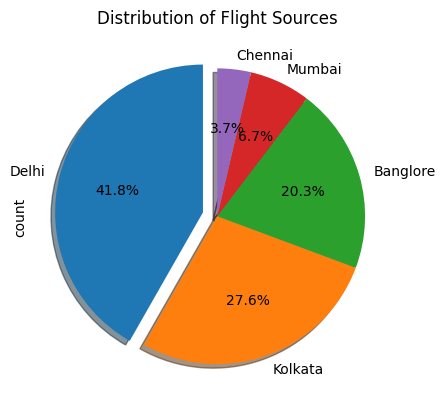

In [417]:
plt.title('Distribution of Flight Sources')
data['Source'].value_counts().sort_values(ascending=False).plot(kind='pie',explode=(0.1,0,0,0,0),shadow=True,autopct="%1.1f%%",startangle=90)
plt.show()

In [418]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_Destination,month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897,Banglore to New Delhi,March
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662,Kolkata to Banglore,May
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882,Delhi to Cochin,June
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218,Kolkata to Banglore,May
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302,Banglore to New Delhi,March


In [419]:
data['month'].value_counts()

month
May      3394
June     3311
March    2585
April    1078
Name: count, dtype: int64

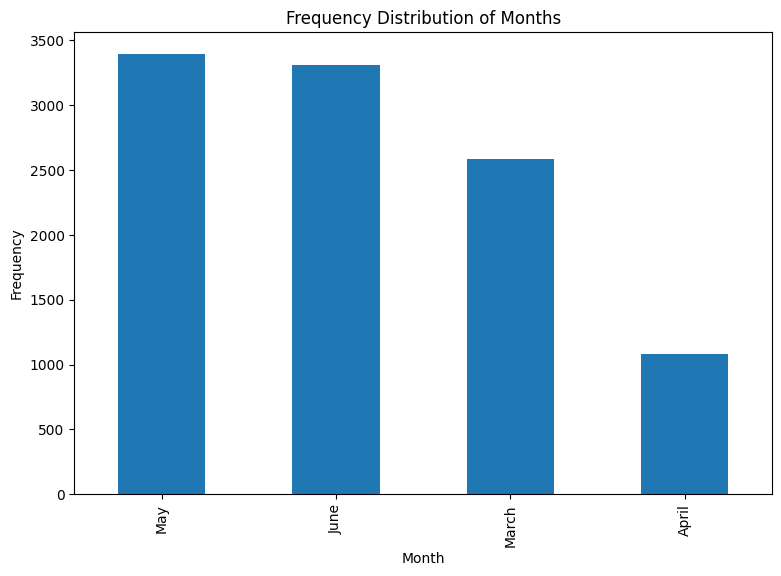

In [420]:
data['month'].value_counts().plot(kind='bar',figsize=(9, 6))
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Months')
plt.show()


In [421]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_Destination,month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897,Banglore to New Delhi,March
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662,Kolkata to Banglore,May
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882,Delhi to Cochin,June
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218,Kolkata to Banglore,May
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302,Banglore to New Delhi,March


In [422]:
data['Source_Destination'].value_counts()

Source_Destination
Delhi to Cochin          4329
Kolkata to Banglore      2859
Banglore to Delhi        1265
Banglore to New Delhi     842
Mumbai to Hyderabad       692
Chennai to Kolkata        381
Name: count, dtype: int64

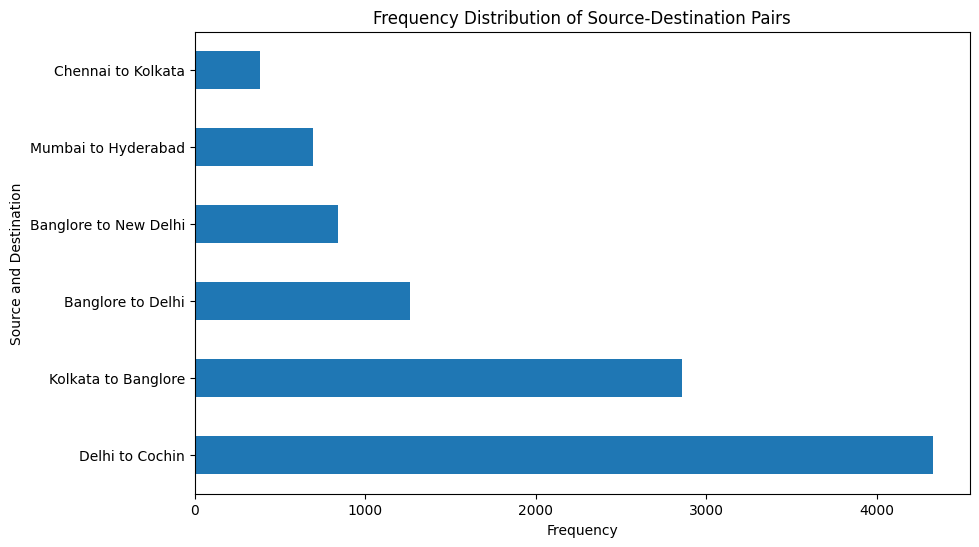

In [423]:
data['Source_Destination'].value_counts().plot(kind='barh',figsize=(10, 6))
plt.xlabel('Frequency')
plt.ylabel('Source and Destination')
plt.title('Frequency Distribution of Source-Destination Pairs')
plt.show()

In [424]:
data.groupby(['Source_Destination','month'])['Price'].sum()

Source_Destination     month
Banglore to Delhi      April     2165429
                       June      2264972
                       May       2076656
Banglore to New Delhi  March     8762650
Chennai to Kolkata     June       593105
                       March      658304
                       May        573540
Delhi to Cochin        April     1532410
                       June     19072010
                       March    11856138
                       May      12500244
Kolkata to Banglore    April     2383935
                       June      6209810
                       March     2785466
                       May      14738063
Mumbai to Hyderabad    April      134562
                       June       785504
                       March     1754223
                       May        731493
Name: Price, dtype: int64

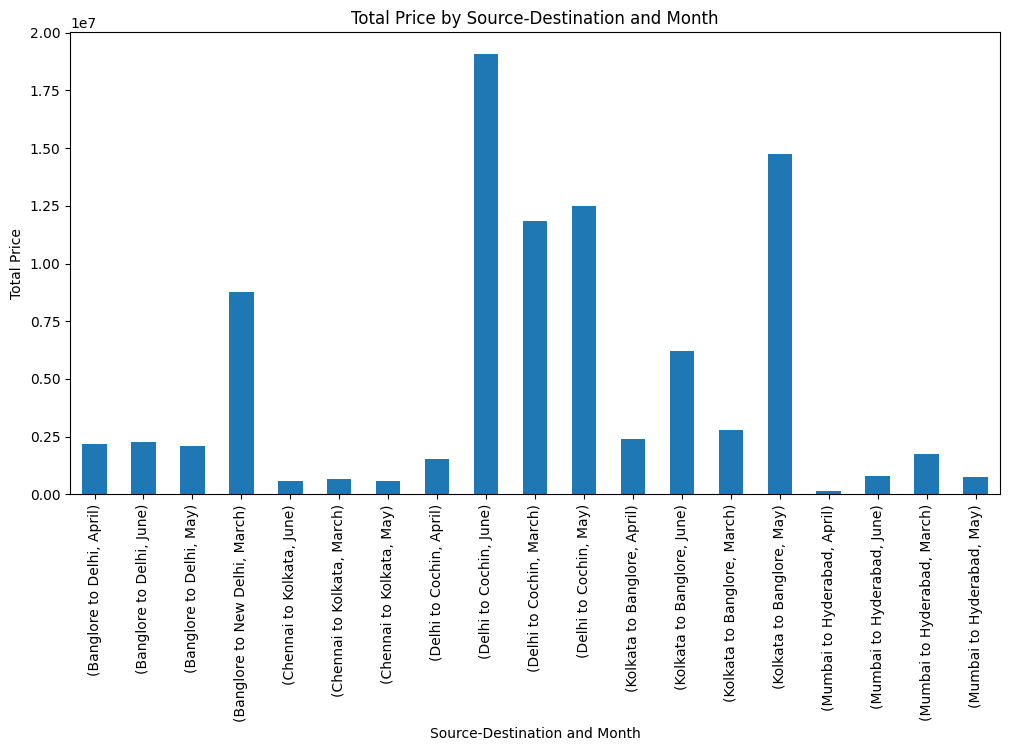

In [425]:
data.groupby(['Source_Destination','month'])['Price'].sum().plot(kind='bar',figsize=(12, 6))
plt.xlabel('Source-Destination and Month')
plt.ylabel('Total Price')
plt.title('Total Price by Source-Destination and Month')
plt.show()

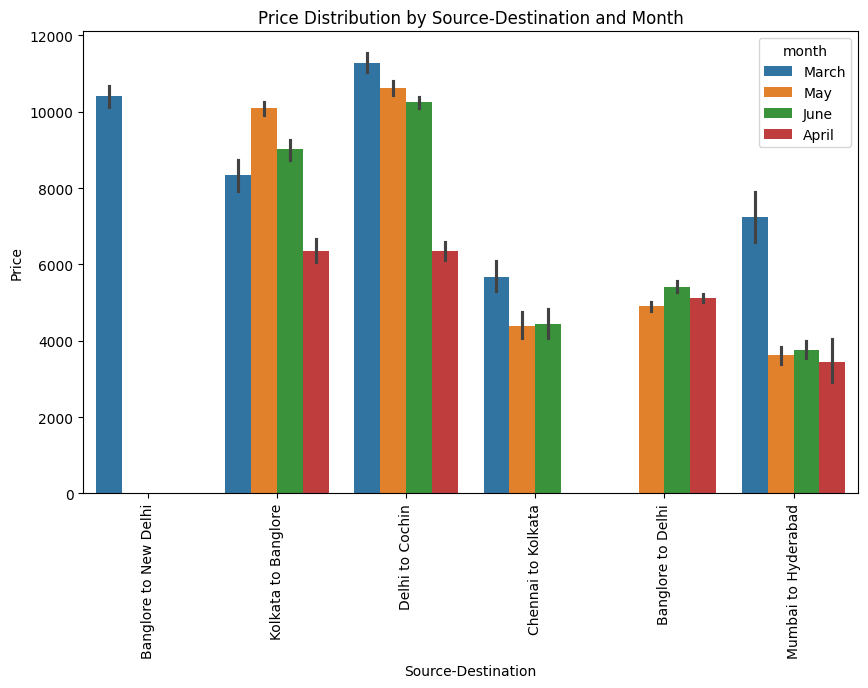

In [426]:
plt.figure(figsize=(10,6))
sns.barplot(x='Source_Destination',y='Price',hue='month',data=data)
plt.xlabel('Source-Destination')
plt.ylabel('Price')
plt.title('Price Distribution by Source-Destination and Month')
plt.xticks(rotation=90)
plt.show()

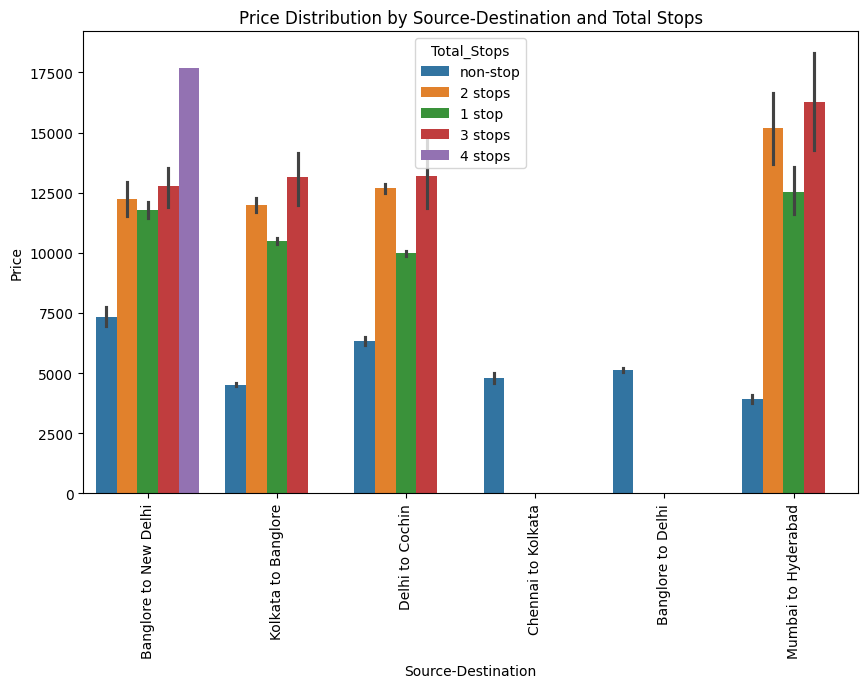

In [427]:
plt.figure(figsize=(10,6))
sns.barplot(x='Source_Destination',y='Price',hue='Total_Stops',data=data)
plt.xlabel('Source-Destination')
plt.ylabel('Price')
plt.title('Price Distribution by Source-Destination and Total Stops')
plt.xticks(rotation=90)
plt.show()


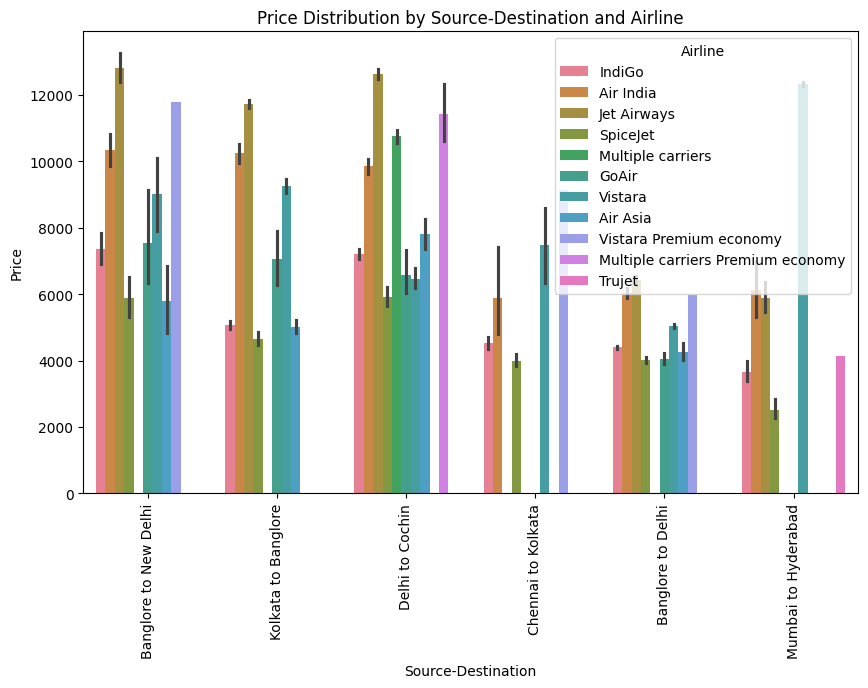

In [428]:
plt.figure(figsize=(10,6))
sns.barplot(x='Source_Destination',y='Price',hue='Airline',data=data)
plt.xlabel('Source-Destination')
plt.ylabel('Price')
plt.title('Price Distribution by Source-Destination and Airline')
plt.xticks(rotation=90)
plt.show()

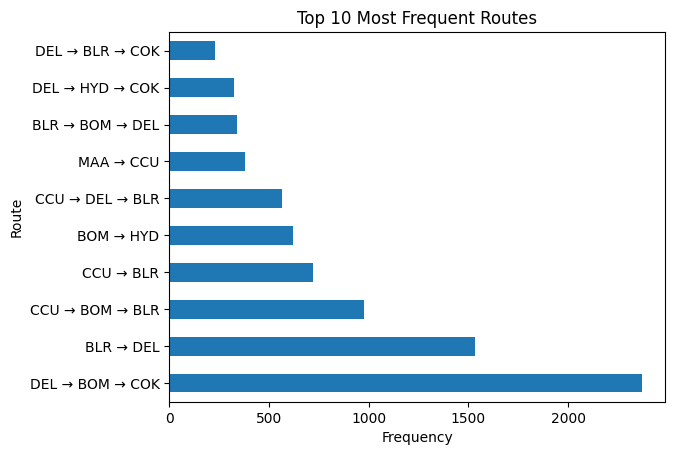

In [429]:
data['Route'].value_counts().head(10).plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Route')
plt.title('Top 10 Most Frequent Routes')
plt.show()

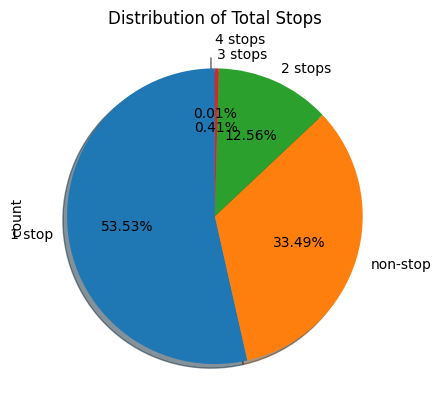

In [430]:
data['Total_Stops'].value_counts().plot(kind='pie',explode=(0,0,0,0,0.1),shadow=True,autopct="%1.2f%%",startangle=90)
plt.title('Distribution of Total Stops')
plt.show()

In [431]:
data['Dep_time'] = data['Dep_Time'].astype(str)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20936\2868109202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dep_time'] = data['Dep_Time'].astype(str)


In [432]:
grouped=data.groupby(['Source_Destination','Dep_time'])['Price'].agg(['max','min'])
grouped

max    min
Source_Destination  Dep_time              
Banglore to Delhi   00:25:00   4077   3419
                    00:30:00   4591   3419
                    01:30:00   5780   3419
                    04:00:00   4423   3943
                    04:55:00   8420   3383
...                             ...    ...
Mumbai to Hyderabad 21:05:00   5462   2050
                    21:10:00  17327  16172
                    21:20:00  12475   2227
                    21:55:00  12395  12395
                    22:45:00  11005   1759

[462 rows x 2 columns]

In [433]:
grouped.reset_index(inplace=True)


In [434]:
grouped

,Source_Destination,Dep_time,max,min
0,Banglore to Delhi,00:25:00,4077,3419
1,Banglore to Delhi,00:30:00,4591,3419
2,Banglore to Delhi,01:30:00,5780,3419
3,Banglore to Delhi,04:00:00,4423,3943
4,Banglore to Delhi,04:55:00,8420,3383
...,...,...,...,...
457,Mumbai to Hyderabad,21:05:00,5462,2050
458,Mumbai to Hyderabad,21:10:00,17327,16172
459,Mumbai to Hyderabad,21:20:00,12475,2227
460,Mumbai to Hyderabad,21:55:00,12395,12395


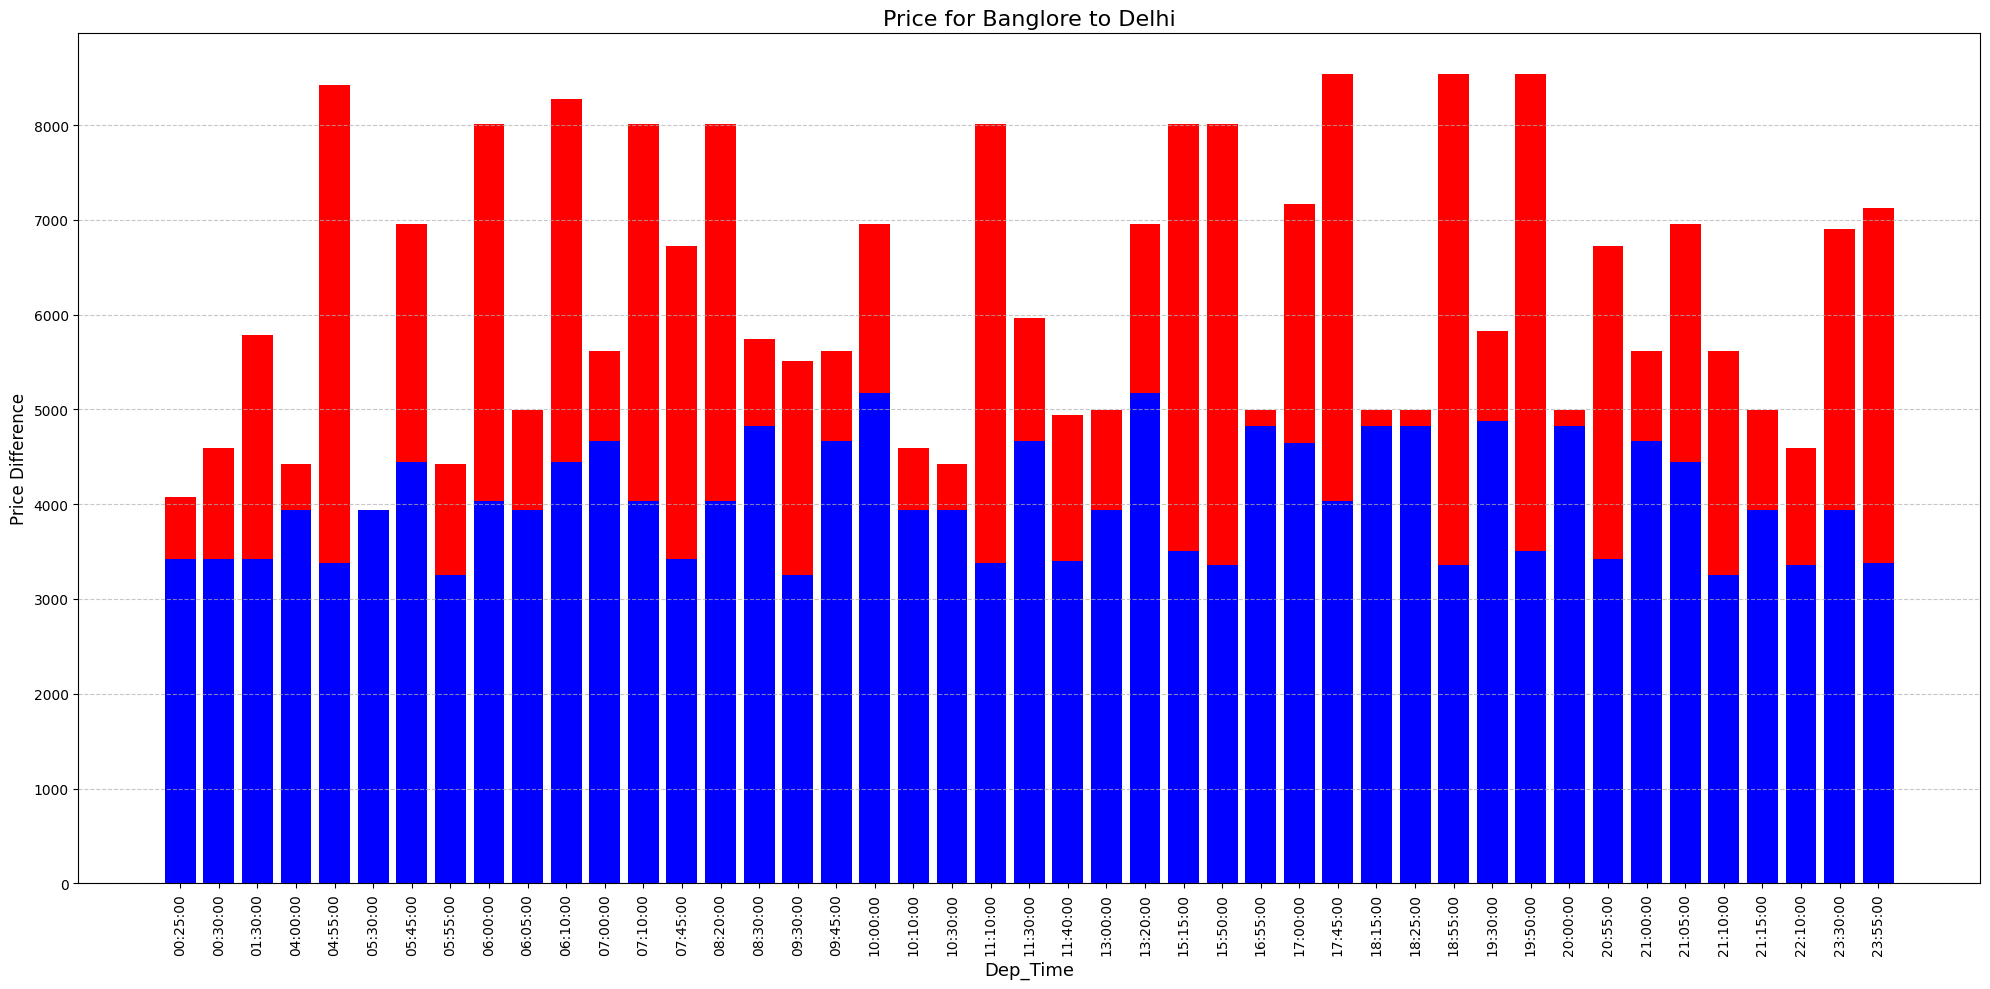

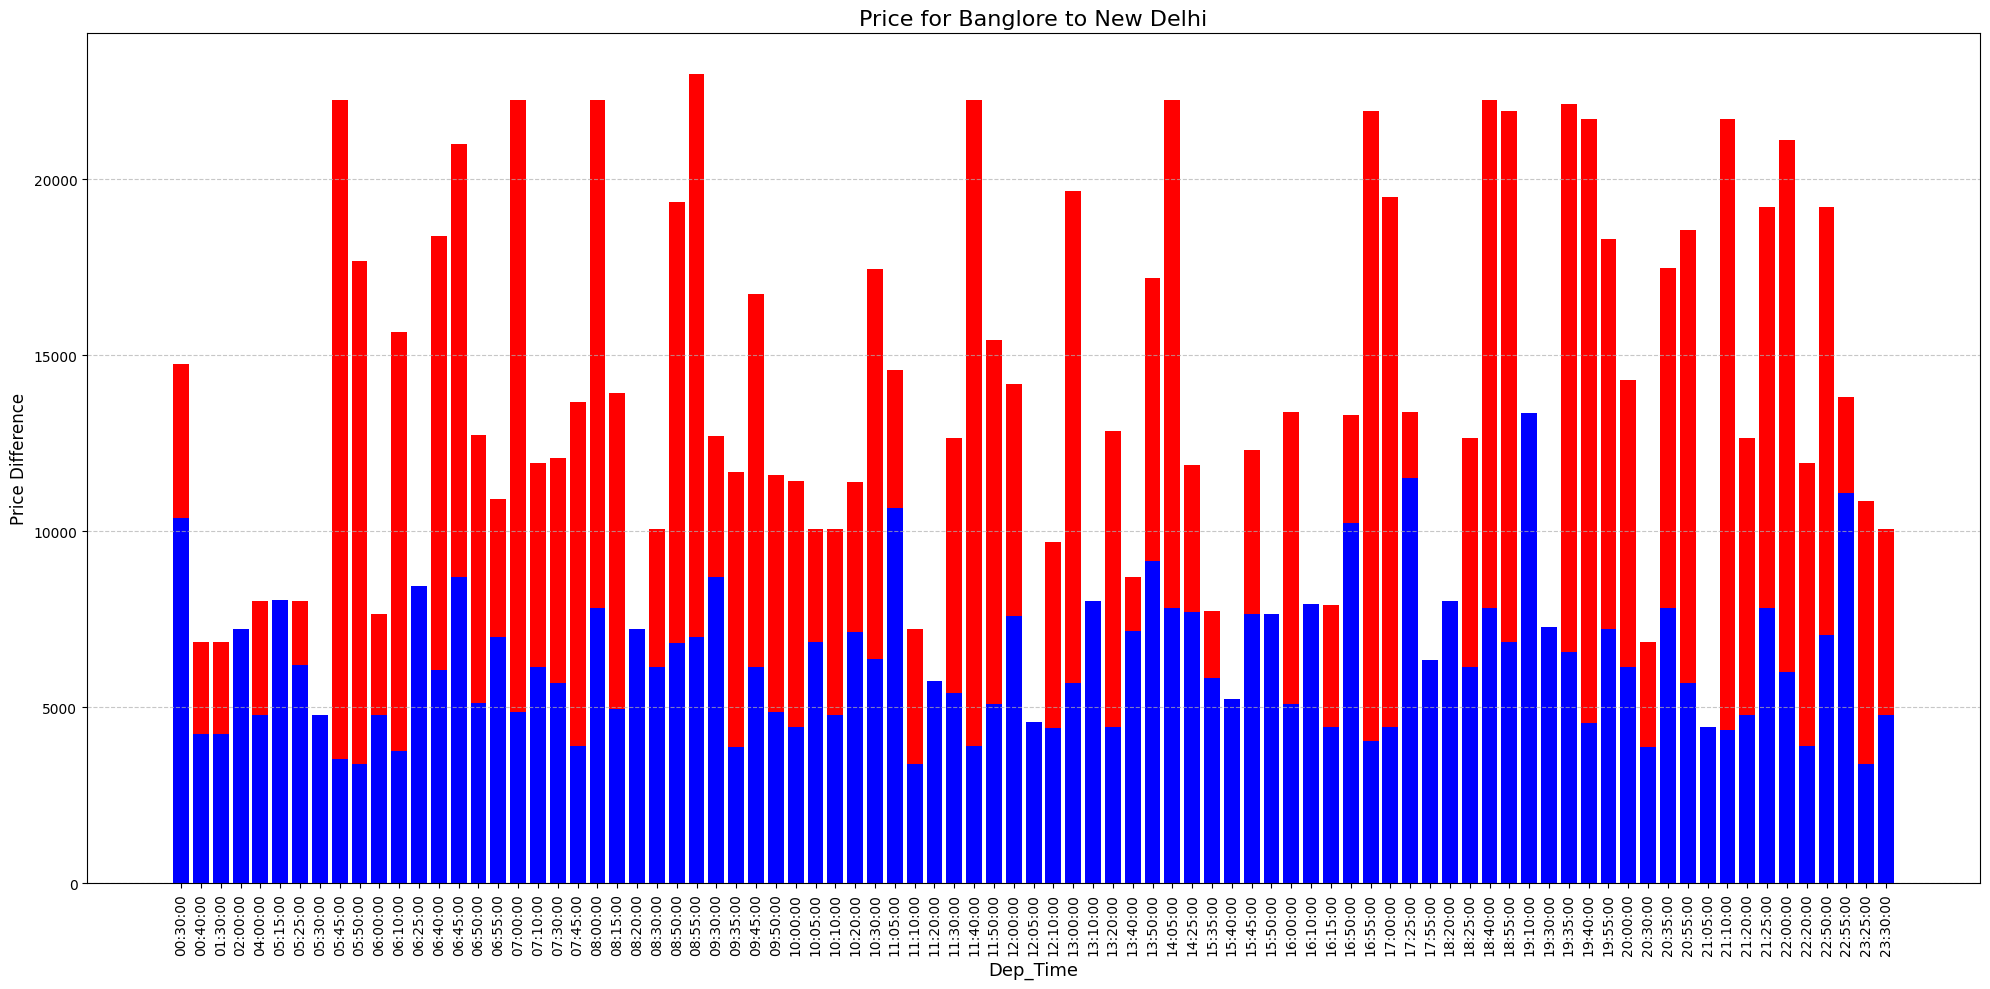

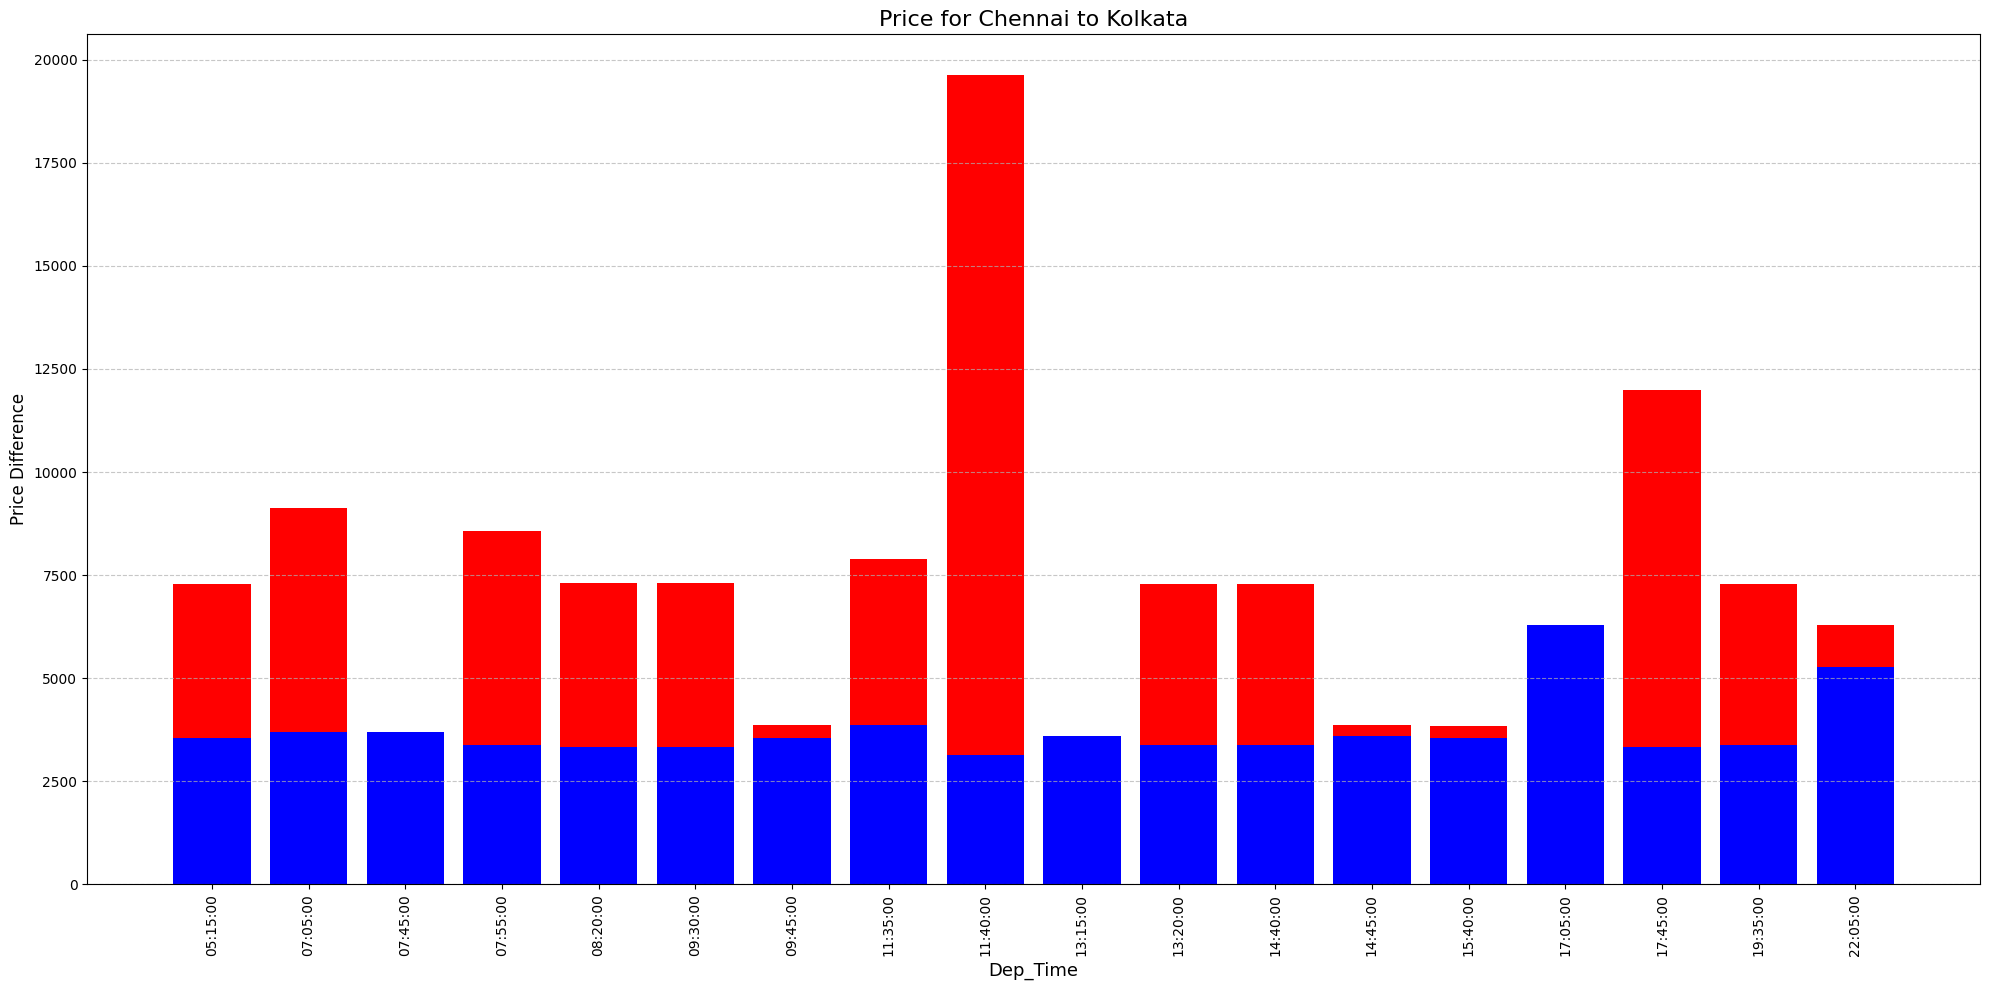

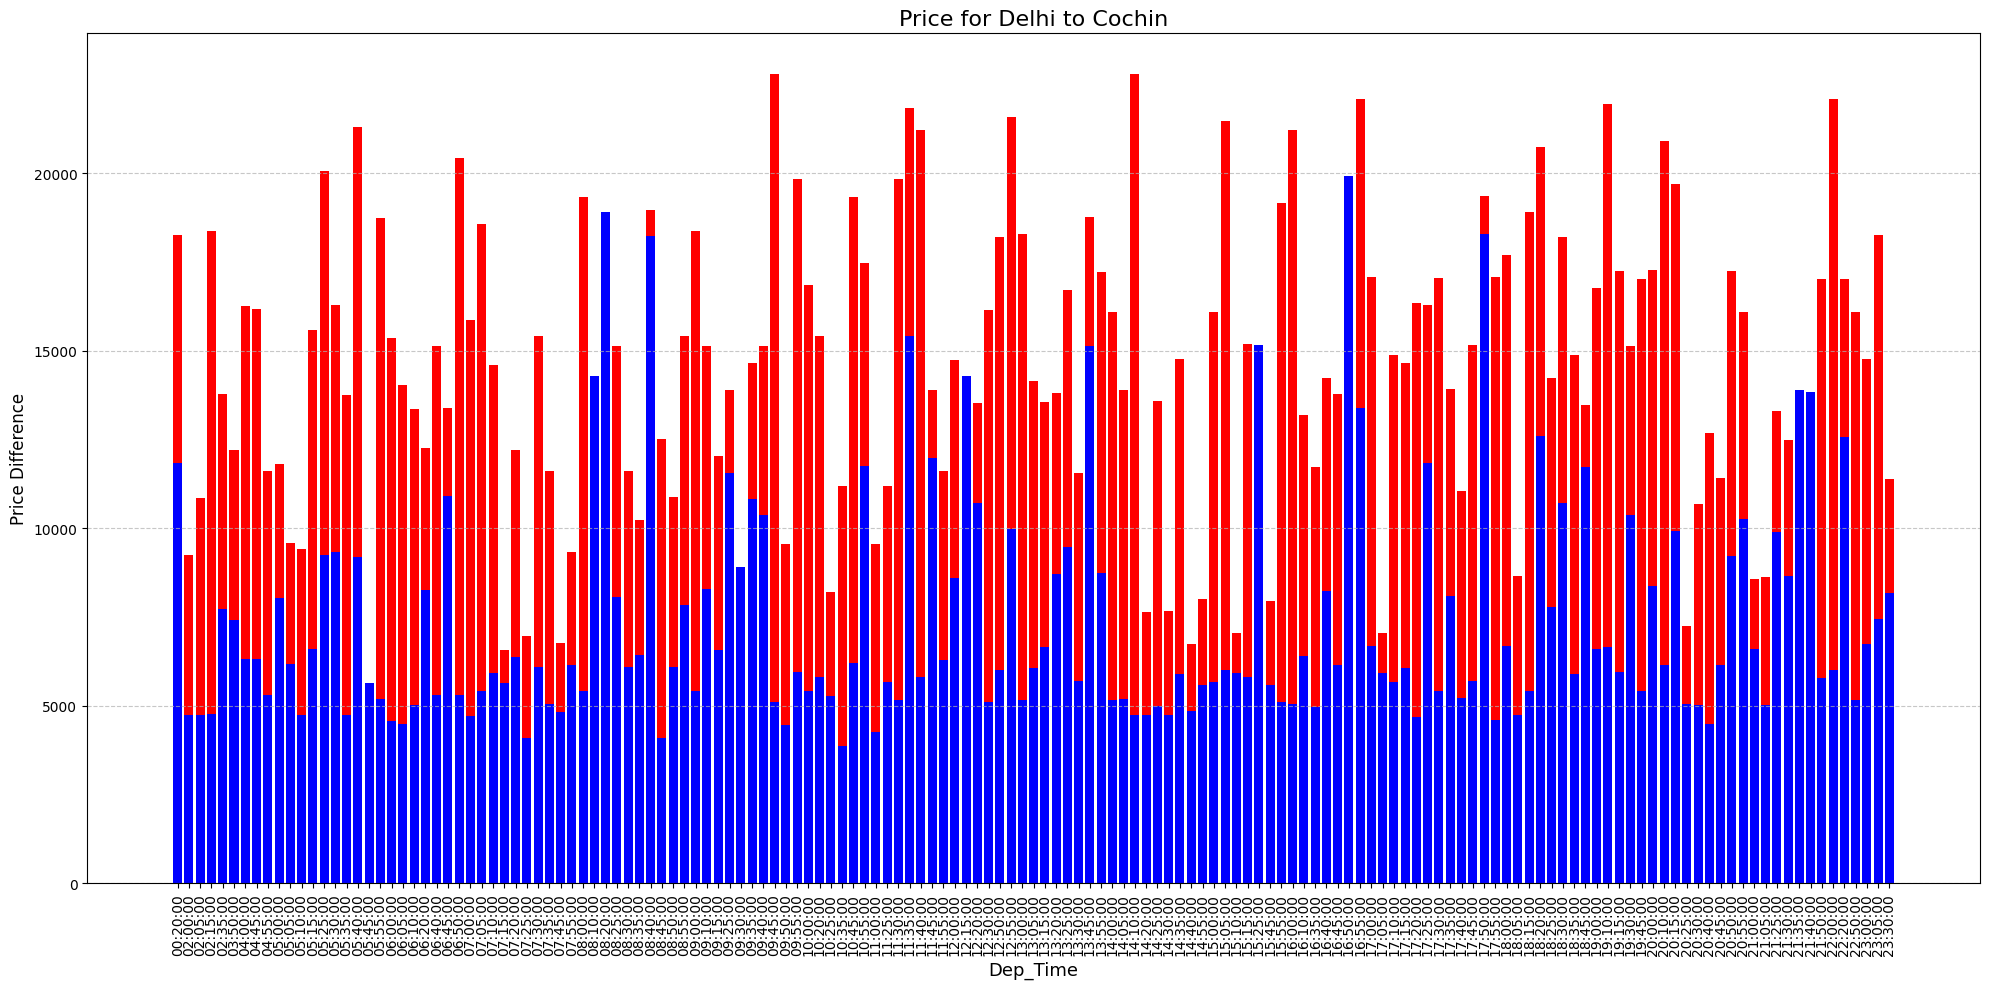

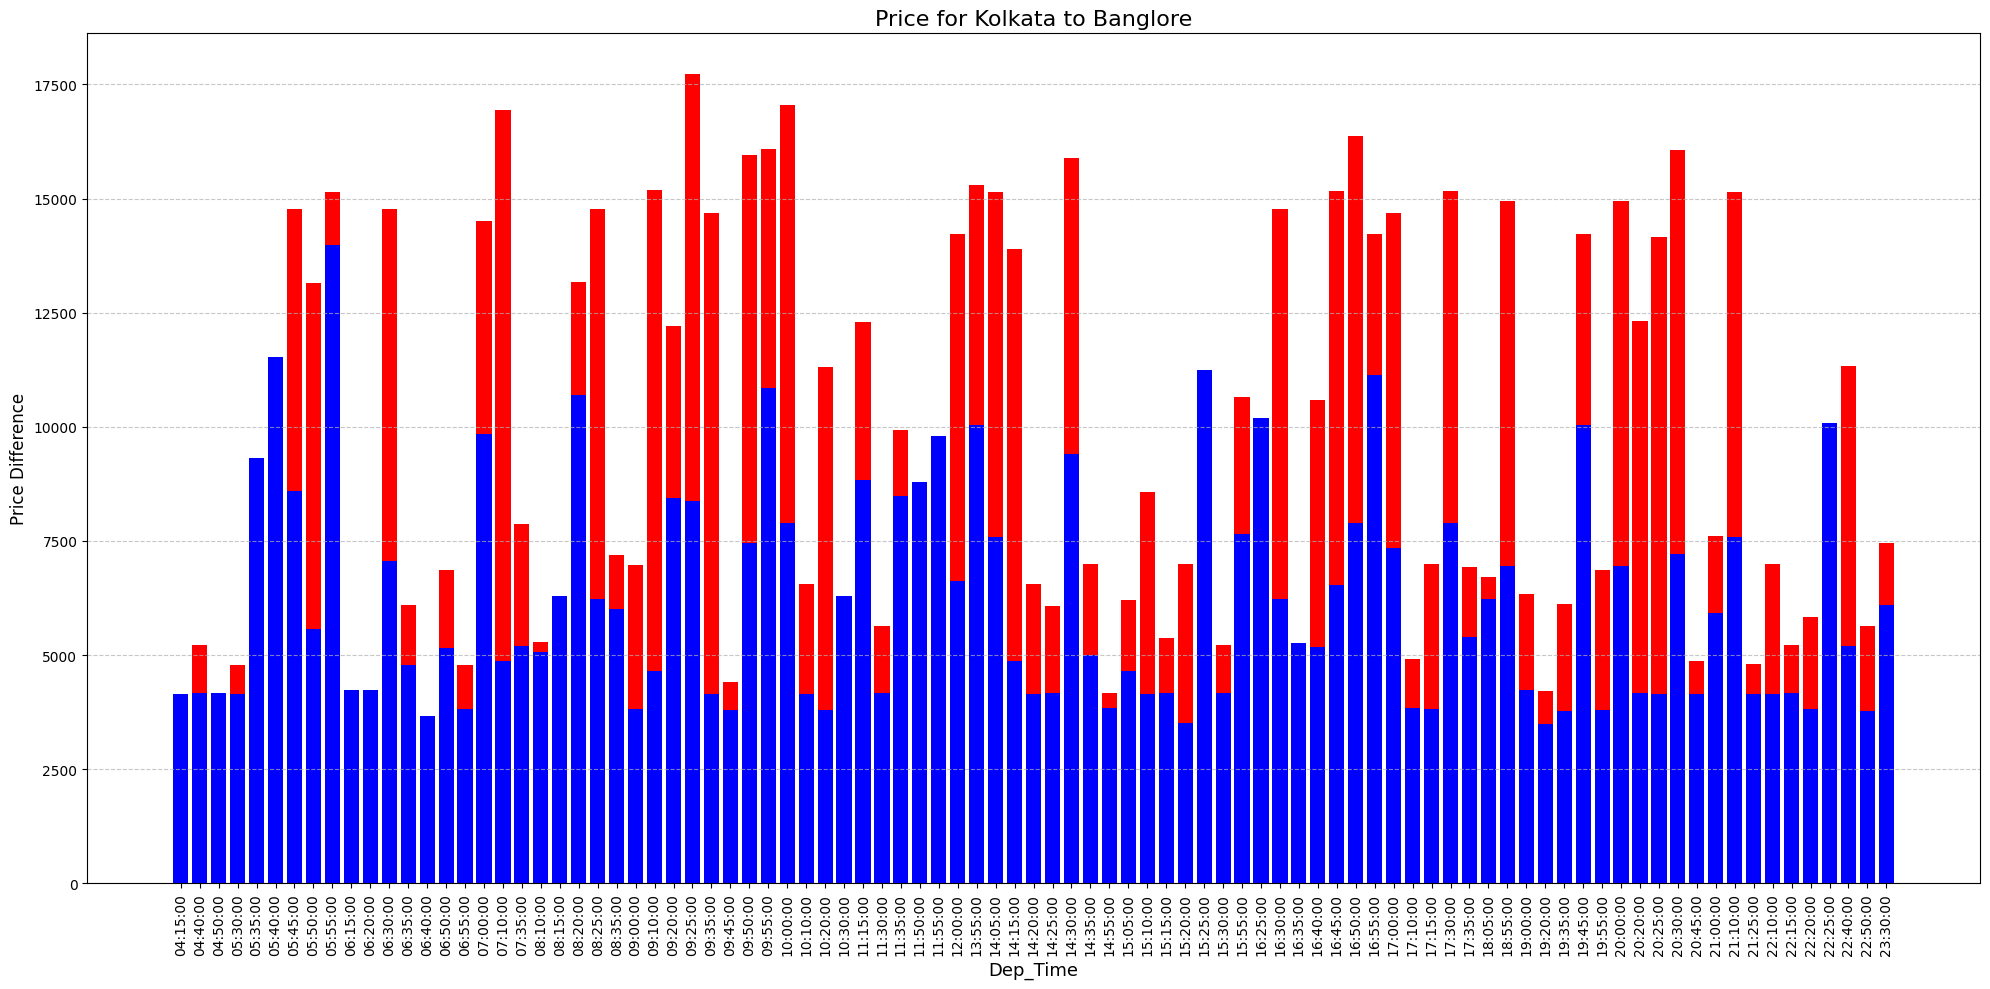

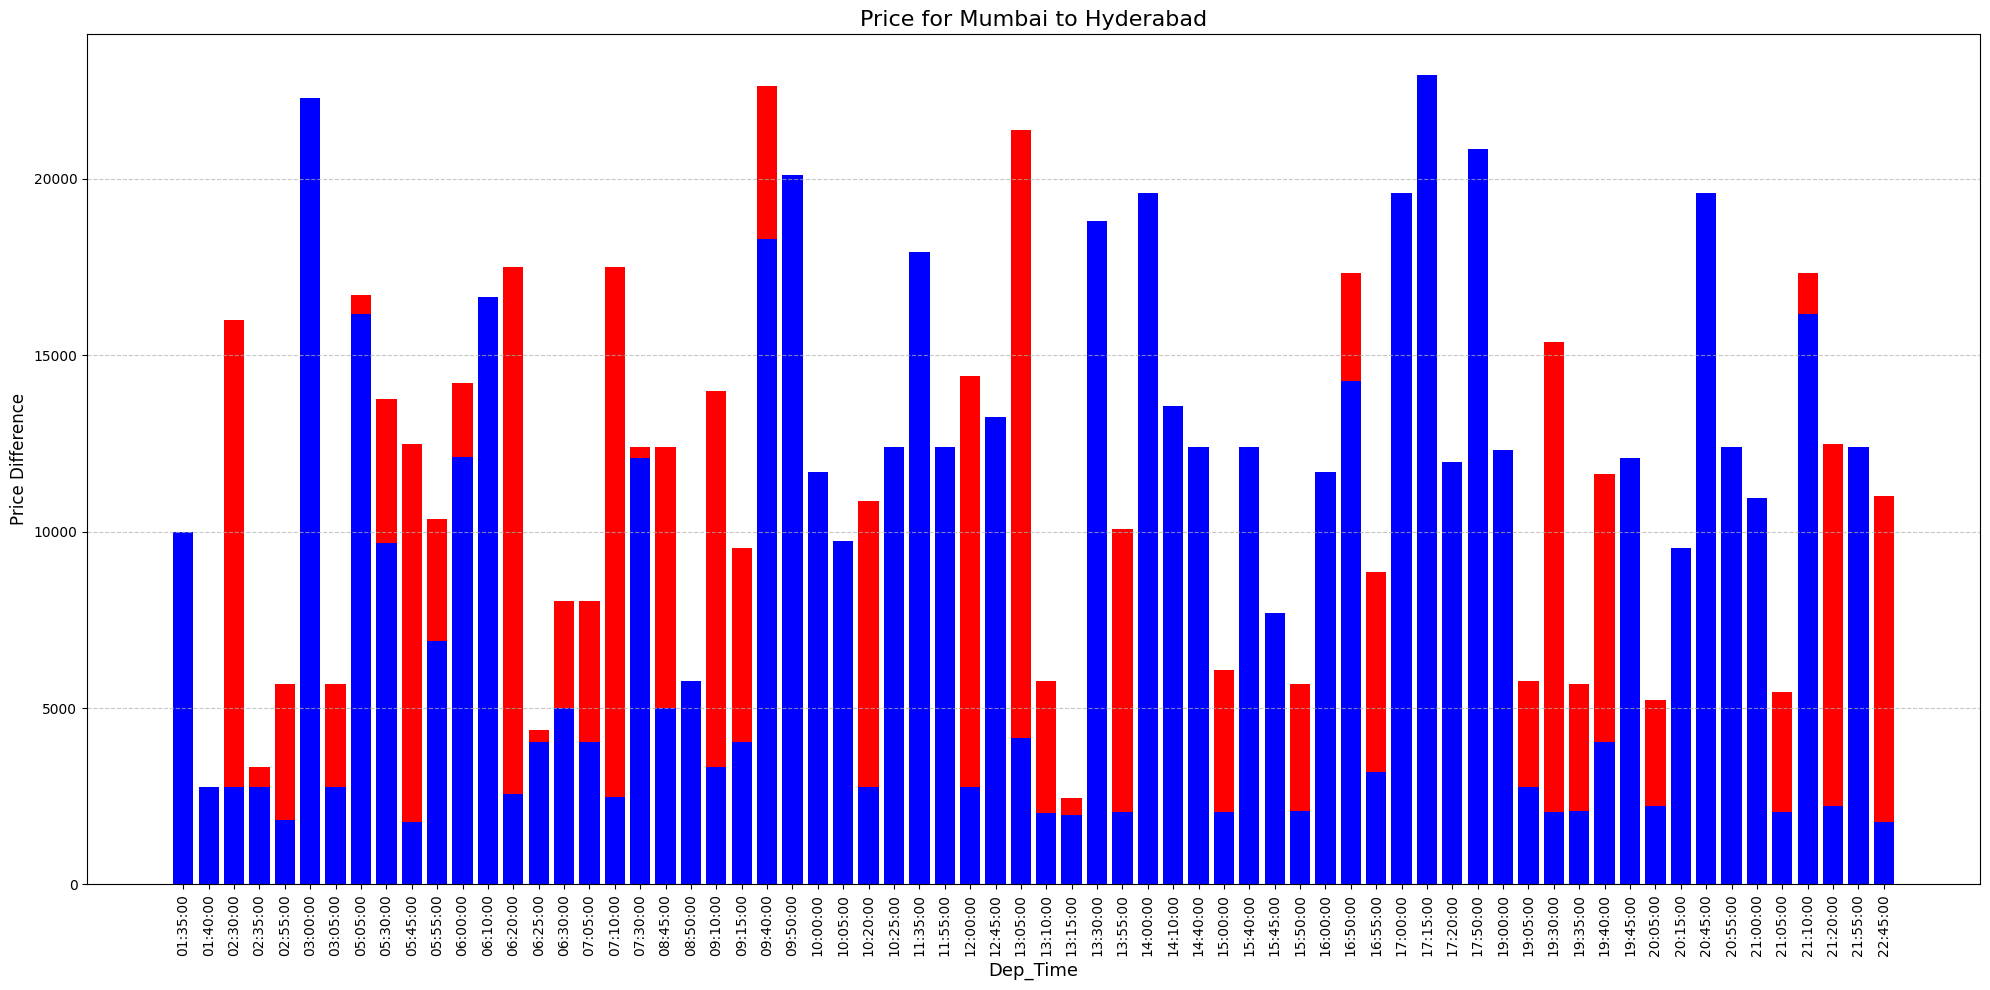

In [435]:
destinations = grouped['Source_Destination'].unique()
for destination in destinations:
    dest_data = grouped[grouped['Source_Destination'] == destination]
    
    # Plot
    plt.figure(figsize=(20, 10))
    plt.bar(dest_data['Dep_time'], dest_data['max'], color='red')
    plt.bar(dest_data['Dep_time'], dest_data['min'], color='blue')
    
    # Add labels and title
    plt.title(f'Price for {destination}', fontsize=16)
    plt.xlabel('Dep_Time', fontsize=13)
    plt.ylabel('Price Difference', fontsize=12)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

In [436]:
data.drop(columns=['Dep_time'],axis=1,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20936\1895964890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Dep_time'],axis=1,inplace=True)


In [437]:
data.describe()

,Date_of_Journey,Price
count,10368,10368.000000
mean,2019-05-05 03:10:00,8832.804205
min,2019-03-01 00:00:00,1759.000000
25%,2019-04-01 00:00:00,5201.000000
50%,2019-05-15 00:00:00,8099.000000
75%,2019-06-06 00:00:00,12224.000000
max,2019-06-27 00:00:00,23001.000000
std,NaN,4069.248472


In [438]:
data.shape

(10368, 13)

In [439]:
data.nunique()

Airline                 11
Date_of_Journey         40
Source                   5
Destination              6
Route                  126
Dep_Time               222
Arrival_Time           223
Duration               368
Total_Stops              5
Additional_Info          7
Price                 1826
Source_Destination       6
month                    4
dtype: int64

In [440]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Source_Destination', 'month'],
      dtype='object')

In [441]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_Destination,month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897,Banglore to New Delhi,March
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662,Kolkata to Banglore,May
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882,Delhi to Cochin,June
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218,Kolkata to Banglore,May
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302,Banglore to New Delhi,March


In [442]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_Destination,month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897,Banglore to New Delhi,March
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662,Kolkata to Banglore,May
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882,Delhi to Cochin,June
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218,Kolkata to Banglore,May
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302,Banglore to New Delhi,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55:00,22:25:00,2h 30m,non-stop,No info,4107,Kolkata to Banglore,April
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45:00,23:20:00,2h 35m,non-stop,No info,4145,Kolkata to Banglore,April
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20:00,11:20:00,3h,non-stop,No info,7229,Banglore to Delhi,April
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30:00,14:10:00,2h 40m,non-stop,No info,12648,Banglore to New Delhi,March


In [443]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Source_Destination', 'month'],
      dtype='object')

In [444]:
data['hours']=data['Duration'].str.extract(r'(\d+)h').fillna(0).astype(int)
data['minuts']=data['Duration'].str.extract(r'(\d+)m').fillna(0).astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20936\811182443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hours']=data['Duration'].str.extract(r'(\d+)h').fillna(0).astype(int)
C:\Users\DELL\AppData\Local\Temp\ipykernel_20936\811182443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['minuts']=data['Duration'].str.extract(r'(\d+)m').fillna(0).astype(int)


In [445]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', 'No Info', '1 Long layover',
       'Change airports', 'Red-eye flight'], dtype=object)

In [446]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [447]:
data['Additional_Info']=data['Additional_Info'].replace('No Info','No info')

C:\Users\DELL\AppData\Local\Temp\ipykernel_20936\1408339489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Additional_Info']=data['Additional_Info'].replace('No Info','No info')


In [448]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover',
       'Change airports', 'Red-eye flight'], dtype=object)

In [449]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Multiple carriers Premium economy',
       'Trujet'], dtype=object)

In [450]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_Destination,month,hours,minuts
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897,Banglore to New Delhi,March,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662,Kolkata to Banglore,May,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882,Delhi to Cochin,June,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218,Kolkata to Banglore,May,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302,Banglore to New Delhi,March,4,45


In [451]:

data['Dep_Minutes_Since_Midnight'] = pd.to_datetime(data['Dep_Time'].astype(str), format='%H:%M:%S').dt.hour * 60 + \
                                 pd.to_datetime(data['Dep_Time'].astype(str), format='%H:%M:%S').dt.minute


C:\Users\DELL\AppData\Local\Temp\ipykernel_20936\4185938859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dep_Minutes_Since_Midnight'] = pd.to_datetime(data['Dep_Time'].astype(str), format='%H:%M:%S').dt.hour * 60 + \


In [452]:
data['Arrive_Minutes_Since_Midnight'] = pd.to_datetime(data['Arrival_Time'].astype(str), format='%H:%M:%S').dt.hour * 60 + \
                                 pd.to_datetime(data['Arrival_Time'].astype(str), format='%H:%M:%S').dt.minute

C:\Users\DELL\AppData\Local\Temp\ipykernel_20936\3772045331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Arrive_Minutes_Since_Midnight'] = pd.to_datetime(data['Arrival_Time'].astype(str), format='%H:%M:%S').dt.hour * 60 + \


In [453]:
# Total_Minutes
data['Total_duration'] = data['hours'] * 60 + data['minuts']

C:\Users\DELL\AppData\Local\Temp\ipykernel_20936\1875786903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total_duration'] = data['hours'] * 60 + data['minuts']


In [454]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_Destination,month,hours,minuts,Dep_Minutes_Since_Midnight,Arrive_Minutes_Since_Midnight,Total_duration
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897,Banglore to New Delhi,March,2,50,1340,70,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662,Kolkata to Banglore,May,7,25,350,795,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882,Delhi to Cochin,June,19,0,565,265,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218,Kolkata to Banglore,May,5,25,1085,1410,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302,Banglore to New Delhi,March,4,45,1010,1295,285


* Convert 1340 minutes into hours and minutes:

    1. 1340 minutes = 22 hours and 20 minutes (as calculated earlier).Add 22 hours and 20 minutes to 12:00 PM:

    2. Adding 22 hours to 12:00 PM brings you to 10:00 AM (the next day).Then add the remaining 20 minutes, which brings the time to 10:20 AM.

In [455]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Source_Destination', 'month', 'hours',
       'minuts', 'Dep_Minutes_Since_Midnight', 'Arrive_Minutes_Since_Midnight',
       'Total_duration'],
      dtype='object')

In [ ]:
x=data[['Airline',
        'Total_Stops',
       'Additional_Info', 'Source_Destination','Route','month','Total_duration','Dep_Minutes_Since_Midnight',
       'Arrive_Minutes_Since_Midnight']]

In [457]:
x

,Airline,Total_Stops,Additional_Info,Source_Destination,Route,Total_duration,Dep_Minutes_Since_Midnight,Arrive_Minutes_Since_Midnight
0,IndiGo,non-stop,No info,Banglore to New Delhi,BLR → DEL,170,1340,70
1,Air India,2 stops,No info,Kolkata to Banglore,CCU → IXR → BBI → BLR,445,350,795
2,Jet Airways,2 stops,No info,Delhi to Cochin,DEL → LKO → BOM → COK,1140,565,265
3,IndiGo,1 stop,No info,Kolkata to Banglore,CCU → NAG → BLR,325,1085,1410
4,IndiGo,1 stop,No info,Banglore to New Delhi,BLR → NAG → DEL,285,1010,1295
...,...,...,...,...,...,...,...,...
10678,Air Asia,non-stop,No info,Kolkata to Banglore,CCU → BLR,150,1195,1345
10679,Air India,non-stop,No info,Kolkata to Banglore,CCU → BLR,155,1245,1400
10680,Jet Airways,non-stop,No info,Banglore to Delhi,BLR → DEL,180,500,680
10681,Vistara,non-stop,No info,Banglore to New Delhi,BLR → DEL,160,690,850


In [458]:
y=data['Price']

In [459]:
# Target Encoding Data

In [460]:
# Calculate mean target value (Price) for each route
target_encoded = data.groupby('Route')['Price'].mean()

# Map the target mean back to the original dataset
x['Route_Encoded'] = data['Route'].map(target_encoded)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20936\1358754584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Route_Encoded'] = data['Route'].map(target_encoded)


In [461]:
x

,Airline,Total_Stops,Additional_Info,Source_Destination,Route,Total_duration,Dep_Minutes_Since_Midnight,Arrive_Minutes_Since_Midnight,Route_Encoded
0,IndiGo,non-stop,No info,Banglore to New Delhi,BLR → DEL,170,1340,70,5525.826597
1,Air India,2 stops,No info,Kolkata to Banglore,CCU → IXR → BBI → BLR,445,350,795,7369.166667
2,Jet Airways,2 stops,No info,Delhi to Cochin,DEL → LKO → BOM → COK,1140,565,265,13277.195122
3,IndiGo,1 stop,No info,Kolkata to Banglore,CCU → NAG → BLR,325,1085,1410,6279.333333
4,IndiGo,1 stop,No info,Banglore to New Delhi,BLR → NAG → DEL,285,1010,1295,11313.000000
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,non-stop,No info,Kolkata to Banglore,CCU → BLR,150,1195,1345,4518.172891
10679,Air India,non-stop,No info,Kolkata to Banglore,CCU → BLR,155,1245,1400,4518.172891
10680,Jet Airways,non-stop,No info,Banglore to Delhi,BLR → DEL,180,500,680,5525.826597
10681,Vistara,non-stop,No info,Banglore to New Delhi,BLR → DEL,160,690,850,5525.826597


In [462]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


In [463]:
encoded_data = encoder.fit_transform(x[['Airline', 'Source_Destination', 'Total_Stops', 'Additional_Info']])



In [464]:
print("Encoded data shape:", encoded_data.shape)


Encoded data shape: (10368, 28)


In [465]:
columns = encoder.get_feature_names_out(['Airline', 'Source_Destination', 'Total_Stops', 'Additional_Info'])
print("Generated columns:", columns)

Generated columns: ['Airline_Air Asia' 'Airline_Air India' 'Airline_GoAir' 'Airline_IndiGo'
 'Airline_Jet Airways' 'Airline_Multiple carriers'
 'Airline_Multiple carriers Premium economy' 'Airline_SpiceJet'
 'Airline_Trujet' 'Airline_Vistara' 'Airline_Vistara Premium economy'
 'Source_Destination_Banglore to Delhi'
 'Source_Destination_Banglore to New Delhi'
 'Source_Destination_Chennai to Kolkata'
 'Source_Destination_Delhi to Cochin'
 'Source_Destination_Kolkata to Banglore'
 'Source_Destination_Mumbai to Hyderabad' 'Total_Stops_1 stop'
 'Total_Stops_2 stops' 'Total_Stops_3 stops' 'Total_Stops_4 stops'
 'Total_Stops_non-stop' 'Additional_Info_1 Long layover'
 'Additional_Info_Change airports'
 'Additional_Info_In-flight meal not included'
 'Additional_Info_No check-in baggage included' 'Additional_Info_No info'
 'Additional_Info_Red-eye flight']


In [466]:
# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=columns, index=x.index)

# Drop original columns
x = pd.concat([x.drop(['Airline', 'Source_Destination', 'Total_Stops', 'Additional_Info','Route'], axis=1), encoded_df], axis=1)


In [467]:
x

,Total_duration,Dep_Minutes_Since_Midnight,Arrive_Minutes_Since_Midnight,Route_Encoded,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,...,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Long layover,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,170,1340,70,5525.826597,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,445,350,795,7369.166667,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1140,565,265,13277.195122,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,325,1085,1410,6279.333333,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,285,1010,1295,11313.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,1195,1345,4518.172891,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10679,155,1245,1400,4518.172891,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10680,180,500,680,5525.826597,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10681,160,690,850,5525.826597,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [468]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(x)
scaled

array([[-0.91495762,  1.65032615, -1.85524814, ..., -0.1778814 ,
         0.52795554, -0.0098214 ],
       [-0.36614531, -1.23125991, -0.08211768, ..., -0.1778814 ,
         0.52795554, -0.0098214 ],
       [ 1.02085306, -0.60546092, -1.37833719, ..., -0.1778814 ,
         0.52795554, -0.0098214 ],
       ...,
       [-0.89500081, -0.79465596, -0.36337286, ..., -0.1778814 ,
         0.52795554, -0.0098214 ],
       [-0.93491443, -0.24162429,  0.05239567, ..., -0.1778814 ,
         0.52795554, -0.0098214 ],
       [-0.25638285, -0.34349855,  0.79833331, ..., -0.1778814 ,
         0.52795554, -0.0098214 ]])

In [469]:
x_train=pd.DataFrame(scaled,columns=x.columns)

In [470]:
x_train

,Total_duration,Dep_Minutes_Since_Midnight,Arrive_Minutes_Since_Midnight,Route_Encoded,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,...,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Long layover,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,-0.914958,1.650326,-1.855248,-1.027431,-0.178170,-0.439583,-0.138088,2.018636,-0.735231,-0.359396,...,-0.378964,-0.064534,-0.009821,1.409317,-0.029476,-0.024063,-0.477645,-0.177881,0.527956,-0.009821
1,-0.366145,-1.231260,-0.082118,-0.454731,-0.178170,2.274886,-0.138088,-0.495384,-0.735231,-0.359396,...,2.638775,-0.064534,-0.009821,-0.709563,-0.029476,-0.024063,-0.477645,-0.177881,0.527956,-0.009821
2,1.020853,-0.605461,-1.378337,1.380809,-0.178170,-0.439583,-0.138088,-0.495384,1.360117,-0.359396,...,2.638775,-0.064534,-0.009821,-0.709563,-0.029476,-0.024063,-0.477645,-0.177881,0.527956,-0.009821
3,-0.605627,0.908099,1.421986,-0.793327,-0.178170,-0.439583,-0.138088,2.018636,-0.735231,-0.359396,...,-0.378964,-0.064534,-0.009821,-0.709563,-0.029476,-0.024063,-0.477645,-0.177881,0.527956,-0.009821
4,-0.685454,0.689797,1.140731,0.770561,-0.178170,-0.439583,-0.138088,2.018636,-0.735231,-0.359396,...,-0.378964,-0.064534,-0.009821,-0.709563,-0.029476,-0.024063,-0.477645,-0.177881,0.527956,-0.009821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10363,-0.954871,1.228276,1.263016,-1.340494,5.612626,-0.439583,-0.138088,-0.495384,-0.735231,-0.359396,...,-0.378964,-0.064534,-0.009821,1.409317,-0.029476,-0.024063,-0.477645,-0.177881,0.527956,-0.009821
10364,-0.944893,1.373810,1.397529,-1.340494,-0.178170,2.274886,-0.138088,-0.495384,-0.735231,-0.359396,...,-0.378964,-0.064534,-0.009821,1.409317,-0.029476,-0.024063,-0.477645,-0.177881,0.527956,-0.009821
10365,-0.895001,-0.794656,-0.363373,-1.027431,-0.178170,-0.439583,-0.138088,-0.495384,1.360117,-0.359396,...,-0.378964,-0.064534,-0.009821,1.409317,-0.029476,-0.024063,-0.477645,-0.177881,0.527956,-0.009821
10366,-0.934914,-0.241624,0.052396,-1.027431,-0.178170,-0.439583,-0.138088,-0.495384,-0.735231,-0.359396,...,-0.378964,-0.064534,-0.009821,1.409317,-0.029476,-0.024063,-0.477645,-0.177881,0.527956,-0.009821


In [471]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(x_train,y)



LinearRegression()

In [472]:
y_pred=model.predict(x_train)

In [473]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("R² Score:", r2_score(y, y_pred))


MAE: 1465.2686083760193
MSE: 4247725.98782539
R² Score: 0.7434512131934659


Text(0, 0.5, 'Sales')

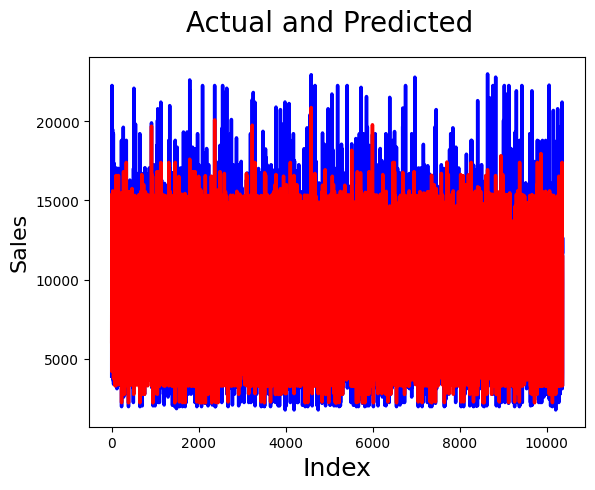

In [474]:
#Actual vs Predicted
c = [i for i in range(len(x_train))]
fig = plt.figure()
plt.plot(c,y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)             
plt.xlabel('Index', fontsize=18)                             
plt.ylabel('Sales', fontsize=16)     

In [475]:
from sklearn.model_selection import KFold
import numpy as np

In [476]:
# kf = KFold(n_splits=3, shuffle=True, random_state=42) 
# mae_scores = []

# # K-Fold Cross-Validation
# for train_index, val_index in kf.split(x_train):
#     X_train_fold, X_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
#     y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

#     # Train the model
#     model.fit(X_train_fold, y_train_fold)

#     # Predict on the validation fold
#     y_pred = model.predict(X_val_fold)

#     # Calculate MAE (or any other evaluation metric)
#     mae = mean_absolute_error(y_val_fold, y_pred)
#     mae_scores.append(mae)
# avg_mae = np.mean(mae_scores)

In [477]:
# print(f"Average MAE: {avg_mae}")

In [480]:
from scipy.stats import probplot

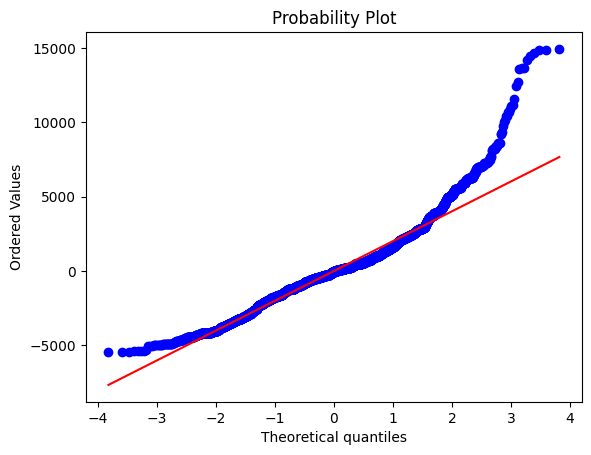

In [481]:
probplot(y-y_pred,dist='norm',plot=plt)
plt.show()